### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load and Prepare the Data

In [2]:
df = pd.read_csv('../Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Pre-processing

#### Check for null values

In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Handling Categorical Data

In [5]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
selected_columns = ["bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [8]:
# Define the binary mapping
binary_mapping = {'yes': 1, 'no': 0}

# Apply binary encoding to binary columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in binary_columns:
    df[column] = df[column].map(binary_mapping)

# Define the order for ordinal encoding
furnishing_order = ['unfurnished', 'semi-furnished', 'furnished']

# Create a mapping for ordinal encoding
furnishing_mapping = {category: index for index, category in enumerate(furnishing_order)}

# Apply the mapping to the 'furnishingstatus' column
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_mapping)

In [9]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
42,7700000,6480,3,2,4,1,0,0,0,1,2,0,0
50,7420000,7440,3,2,4,1,0,0,0,0,1,1,0
202,4900000,4120,2,1,1,1,0,1,0,0,1,0,1
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,2
279,4270000,6360,2,1,1,1,0,0,0,0,0,0,2
439,3255000,3930,2,1,1,0,0,0,0,0,0,0,0
29,8400000,5500,4,2,2,1,0,1,0,1,1,1,1
255,4480000,5885,2,1,1,1,0,0,0,1,1,0,0


In [10]:
X = df.drop(columns=['price'])
y = df['price'] 

In [11]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Split the Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Linear Regression class

In [13]:
class LINEARREGRESSION:
    def __init__(self):
        self.coef = None
        self.intercept = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        
        self.intercept = betas[0]
        self.coef = betas[1:]
        
    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef) + self.intercept
        return y_pred
    
    def coefficients(self):
        return self.coef
    
    def intercept_(self):
        return self.intercept

### Create and Train the Model

In [14]:
model = LINEARREGRESSION()
model.fit(X_train, y_train)

### Make Predictions

In [15]:
y_pred = model.predict(X_test)

In [16]:
intercept = model.intercept_()
coefficients = model.coefficients()

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Intercept: -127711.16739237076
Coefficients: [2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]


### Evaluate the Model

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1771751116594.0352
R-squared: 0.6494754192267803


### Visualize the Results

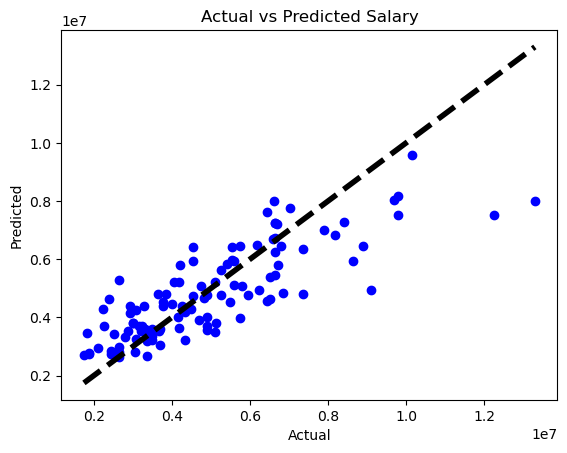

In [19]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary')
plt.show()
